###1.Collecting Data a. Choose five distinct equities or assets (oil, gold, bonds, currency pairs, bitcoins, etc…).

   a. Verify there is data available to import from Quandl, Alpha Vantage or Yahoo Finance.

   b. Import daily prices (adj closing or spot) for all five assets. Use 1/1/2019 as the start date and 12/31/2019 as the end date. Display the first 5 rows and the total count for each asset.

   c. Import daily prices for the S&P 500. Use 1/1/2019 as the start date and 12/31/2019 as the end date. Display the first 5 rows and the total count of the S&P.

In [1]:
! pip install yfinance # import data from Yahoo Finance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
def total_count(List):
  total = 0
  for i in List:
    if str(i) == 'nan':
      i = 0
    total += i
  return total

import pandas as pd
assets = ['BTC-USD','EURUSD=X','^TNX','GC=F','CL=F']

import yfinance as yf
data = yf.download(assets, '2019-01-01', '2019-12-31')['Adj Close']

data1 = yf.download('BTC-USD', '2019-01-01', '2019-12-31')['Adj Close']
data2 = yf.download('EURUSD=X', '2019-01-01', '2019-12-31')['Adj Close']
data3 = yf.download('^TNX', '2019-01-01', '2019-12-31')['Adj Close']
data4 = yf.download('GC=F', '2019-01-01', '2019-12-31')['Adj Close']
data5 = yf.download('CL=F', '2019-01-01', '2019-12-31')['Adj Close']

data_SP = yf.download('^GSPC', '2019-01-01', '2019-12-31')['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Display the first 5 rows and the total count for each asset.

print("Bitcoin USD :", total_count(data1))
print("EUR/USD     :", total_count(data2))
print("10-Yr Bond  :", total_count(data3))
print("Gold        :", total_count(data4))
print("Crude Oil   :", total_count(data5))
print("\n")

df = pd.DataFrame(data)
df.reset_index(inplace = True)
df.head()

Bitcoin USD : 2699264.8928222656
EUR/USD     : 291.1571753025055
10-Yr Bond  : 536.4369982481003
Gold        : 349446.49963378906
Crude Oil   : 14313.48000717163




,Date,BTC-USD,CL=F,EURUSD=X,GC=F,^TNX
0,2019-01-01,3843.520020,NaN,1.149306,NaN,NaN
1,2019-01-02,3943.409424,46.540001,1.146171,1281.000000,2.661
2,2019-01-03,3836.741211,47.090000,1.131811,1291.800049,2.554
3,2019-01-04,3857.717529,47.959999,1.139108,1282.699951,2.659
4,2019-01-05,3845.194580,NaN,NaN,NaN,NaN


In [4]:
# Display the first 5 rows and the total count for S&P 500.
print("S&P 500 :", total_count(data_SP))
print("\n")

df_SP = pd.DataFrame(data_SP)
df_SP.reset_index(inplace = True)
df_SP.head()



S&P 500 : 730935.0278320312




,Date,Adj Close
0,2019-01-02,2510.030029
1,2019-01-03,2447.889893
2,2019-01-04,2531.939941
3,2019-01-07,2549.689941
4,2019-01-08,2574.409912


###2.	Processing Data

  a.	Calculate daily % change (adj closing or spot) for each of the asset and the S&P. Display the first 5 rows and the total count for each data set.

  b.	Plot the daily % change (adj closing or spot) data using a bar graph for each asset.
  
  c.	Calculate and display the mean, standard deviation, variance, min, and max for each set of data.



In [5]:
def precChange(x,y):
  result = 0
  result = round((x-y)/x,5)
  return result


def All(List,y):
  Result = []
  for i in range(0, len(List)):
    if i == 0:
      if List[i] == 'NaN':
        Result.append('NaN')
      else:
        Result.append(precChange(List[i],y))
    elif i != 0:
      if List[i] == 'NaN':
        Result.append('NaN')
      else:
        Result.append(precChange(List[i],List[i-1]))
  return Result

data_previous = yf.download(assets,'2018-12-31', '2019-01-01')['Adj Close']
df_previous = pd.DataFrame(data_previous)
df_previous

[*********************100%***********************]  5 of 5 completed


,BTC-USD,CL=F,EURUSD=X,GC=F,^TNX
Date,,,,,
2018-12-31,3742.700439,45.41,1.143995,1278.300049,2.686
2019-01-01,3843.520020,NaN,1.149306,NaN,NaN


In [6]:
df_change = pd.DataFrame()

df_change['Date'] = df['Date']
df_change['BTC-USD'] = All(df['BTC-USD'],df_previous['BTC-USD'][0])
df_change['CL=F'] = All(df['CL=F'],df_previous['CL=F'][0])
df_change['EURUSD=X'] = All(df['EURUSD=X'],df_previous['EURUSD=X'][0])
df_change['GC=F'] = All(df['GC=F'],df_previous['GC=F'][0])
df_change['^TNX'] = All(df['^TNX'],df_previous['^TNX'][0])


# display the total count of % change
print("Bitcoin USD :", total_count(df_change['BTC-USD']))
print("EUR/USD     :", total_count(df_change['CL=F']))
print("10-Yr Bond  :", total_count(df_change['EURUSD=X']))
print("Gold        :", total_count(df_change['GC=F']))
print("Crude Oil   :", total_count(df_change['^TNX']))
print('\n')
# display the first 5 rows of % change 
df_change.head()


Bitcoin USD : 0.4263400000000008
EUR/USD     : 0.19539000000000015
10-Yr Bond  : -0.030229999999999955
Gold        : 0.14364
Crude Oil   : -0.4678099999999999




,Date,BTC-USD,CL=F,EURUSD=X,GC=F,^TNX
0,2019-01-01,0.02623,NaN,0.00462,NaN,NaN
1,2019-01-02,0.02533,NaN,-0.00274,NaN,NaN
2,2019-01-03,-0.02780,0.01168,-0.01269,0.00836,-0.04190
3,2019-01-04,0.00544,0.01814,0.00641,-0.00709,0.03949
4,2019-01-05,-0.00326,NaN,NaN,NaN,NaN


In [7]:
data_previous_SP = yf.download('^GSPC','2018-12-31', '2019-01-01')['Adj Close']
df_previous_SP = pd.DataFrame(data_previous_SP)

df_change_SP = pd.DataFrame()
df_change_SP['Date'] = df_SP['Date']
df_change_SP['S&P 500'] = All(df_SP['Adj Close'],df_previous_SP['Adj Close'][0])


# display the total count of S&P 500 and frist 5 rows
print("S&P 500 :", total_count(df_change_SP['S&P 500']))
print('\n')

df_change_SP.head()

[*********************100%***********************]  1 of 1 completed
S&P 500 : 0.24283000000000002




,Date,S&P 500
0,2019-01-02,0.00127
1,2019-01-03,-0.02539
2,2019-01-04,0.03320
3,2019-01-07,0.00696
4,2019-01-08,0.00960


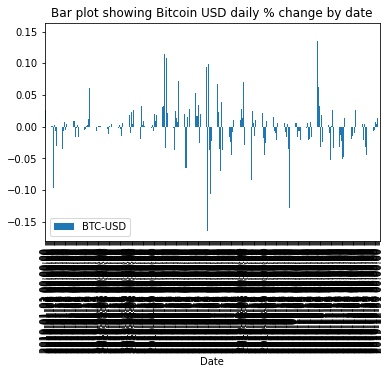

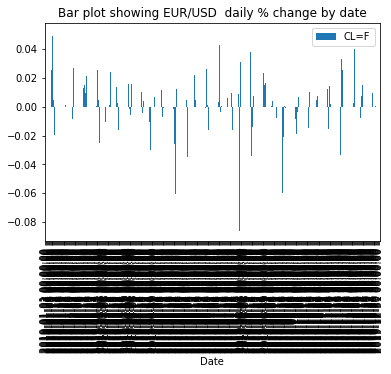

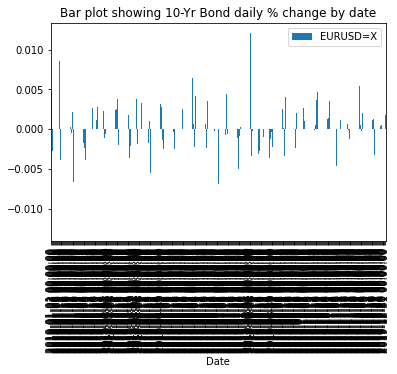

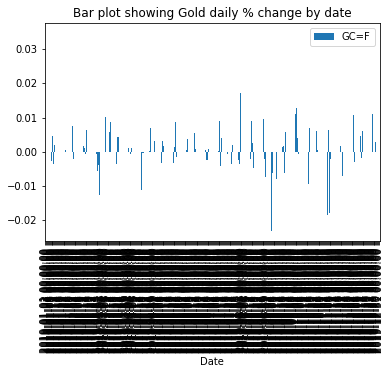

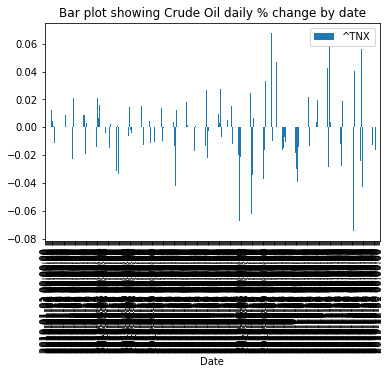

The variance of each asset: 
 BTC-USD     0.001240
CL=F        0.000418
EURUSD=X    0.000010
GC=F        0.000051
^TNX        0.000526
dtype: float64 



,BTC-USD,CL=F,EURUSD=X,GC=F,^TNX
count,365.000000,195.000000,207.000000,195.000000,195.000000
mean,0.001168,0.001002,-0.000146,0.000737,-0.002399
std,0.035216,0.020453,0.003177,0.007114,0.022942
min,-0.163950,-0.085820,-0.012690,-0.023030,-0.074310
25%,-0.012770,-0.008175,-0.002070,-0.002830,-0.014435
50%,0.001200,0.002100,-0.000090,0.001080,-0.004040
75%,0.015050,0.013000,0.001465,0.004290,0.010360
max,0.147890,0.051020,0.012070,0.034680,0.067730


In [8]:
import matplotlib.pyplot as plt 

# Plot the daily % change (adj closing or spot) data using a bar graph for each asset
df_change.plot(x='Date', y= 'BTC-USD', title = "Bar plot showing Bitcoin USD daily % change by date", kind = 'bar')
plt.show()

df_change.plot(x='Date', y= 'CL=F', title = "Bar plot showing EUR/USD  daily % change by date", kind = 'bar')
plt.show()

df_change.plot(x='Date', y= 'EURUSD=X', title = "Bar plot showing 10-Yr Bond daily % change by date", kind = 'bar')
plt.show()

df_change.plot(x='Date', y= 'GC=F', title = "Bar plot showing Gold daily % change by date", kind = 'bar')
plt.show()

df_change.plot(x='Date', y= '^TNX', title = "Bar plot showing Crude Oil daily % change by date", kind = 'bar')
plt.show()

# Calculate and display the mean, standard deviation, variance, min, and max for each set of data.
print("The variance of each asset: \n", df_change.var(),"\n")
df_change.describe()


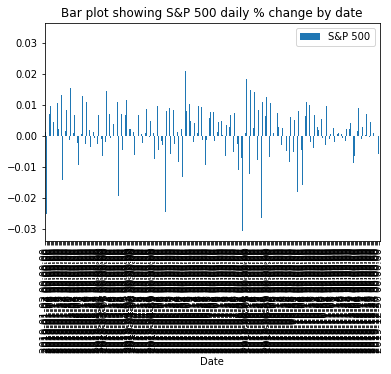


The variance:  S&P 500    0.000062
dtype: float64 



,S&P 500
count,251.000000
mean,0.000967
std,0.007895
min,-0.030690
25%,-0.002510
50%,0.001010
75%,0.005955
max,0.033200


In [9]:
# Plot the daily % change (adj closing or spot) data using a bar graph for S&P 500
df_change_SP.plot(x='Date', y= 'S&P 500', title = "Bar plot showing S&P 500 daily % change by date", kind = 'bar')
plt.show()

# Calculate and display the mean, standard deviation, variance, min, and max for S&P 500
print("\nThe variance: ", df_change_SP.var(),'\n')
df_change_SP.describe()

### 3.	Regression Analysis

  a.	Using scikit-learn, perform five linear regressions for each of the five assets against the S&P 500. Y should be % change S&P 500. X should be % change for each asset.

  b.	For each regression, plot the samples and the linear model. Label the Y axis as S&P 500 and the X axis as each asset.

  c.	Calculate and display the intercept, coefficient (slope), R2, and the Mean squared error.

  d.	Which asset is highly correlated with the S&P 500 and which asset is the least correlated?


In [10]:
#3A) Install Sckikit
! pip install scikit-learn
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def prepare_data(asset_name):
    asset_data = df_change[["Date", asset_name]]
    data = df_change_SP.merge(asset_data, on="Date", how="left")
    data = data.dropna(axis=0, subset=[asset_name]).reset_index(drop=True)
    X = data[asset_name].values.reshape((-1, 1))
    y = data["S&P 500"].values
    return X, y

def regression_analysis(asset_name, x_cord, y_cord):
    X, y = prepare_data(asset_name)
    lr = LinearRegression()
    lr.fit(X, y)

    # C) Calculate Metrics
    r2 = round(lr.score(X, y), 4)
    mse = round(mean_squared_error(y, lr.predict(X)), 4)
    coef = round(lr.coef_[0], 4)
    intercept = round(lr.intercept_, 4)

    # D) Correlation Coefficient Calculation
    correlation = np.corrcoef(np.squeeze(X), y)[0, 1]
    minimum, maximum = np.min(np.squeeze(X)), np.max(np.squeeze(X))
    minimum -= np.abs(minimum/4)
    maximum += np.abs(maximum/4)
    X_line = np.linspace(minimum, maximum, 100)
    y_line = coef*X_line + intercept
    display = "R2 = {}\nMSE = {}\nCoef = {}\nIntercept = {}".format(r2, mse, coef, intercept)

    # B) Plotting Samples
    plt.figure(figsize=(15, 5))
    plt.scatter(np.squeeze(X), y)
    plt.plot(X_line, y_line, "r")
    plt.text(x_cord, y_cord, s=display, fontsize=15)
    plt.xlabel(asset_name)
    plt.ylabel("S&P 500")
    plt.show()
    
    return correlation

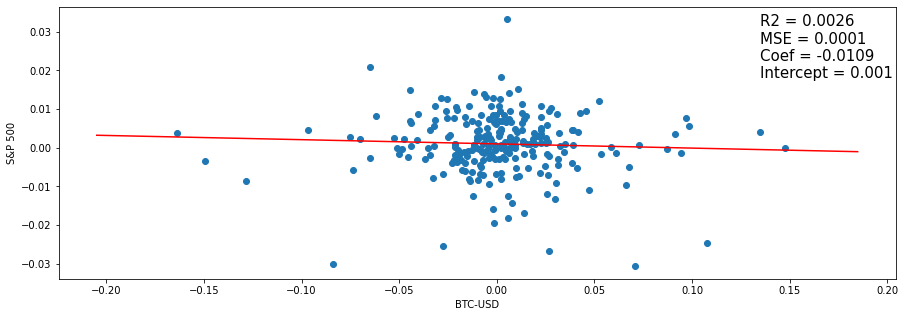

Correlation Coefficient: -0.050680972708552235


In [11]:
correlation_btc = regression_analysis("BTC-USD", 0.135, 0.018)
print("Correlation Coefficient: {}".format(correlation_btc))

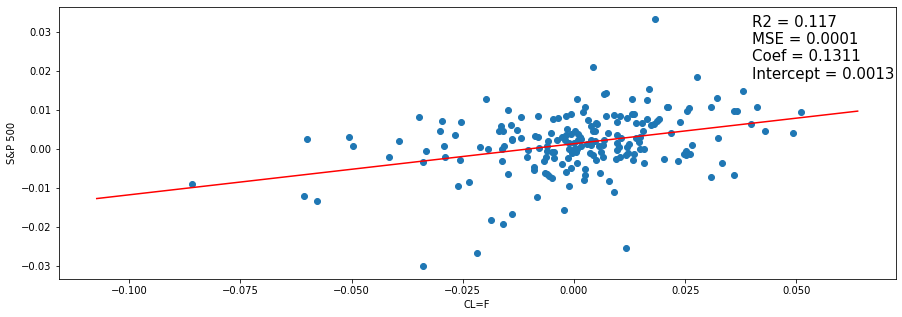

Correlation Coefficient: 0.3419808390151287


In [12]:
correlation_clf = regression_analysis("CL=F", 0.040, 0.018)
print("Correlation Coefficient: {}".format(correlation_clf))

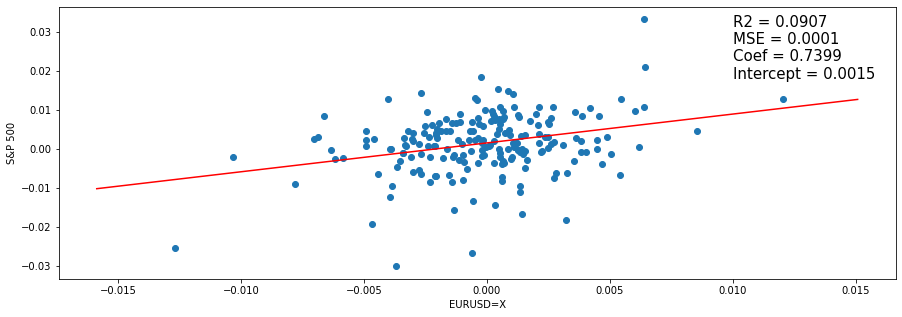

Correlation Coefficient: 0.30122885911663366


In [13]:
correlation_eur = regression_analysis("EURUSD=X", 0.01, 0.018)
print("Correlation Coefficient: {}".format(correlation_eur))

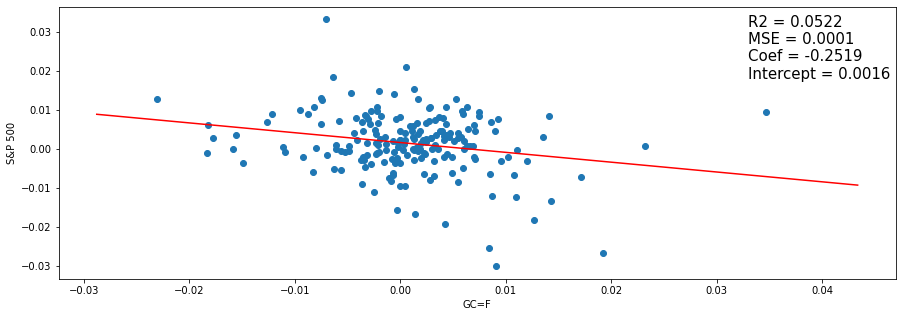

Correlation Coefficient: -0.22853403674189784


In [14]:
correlation_gc = regression_analysis("GC=F", 0.033, 0.018)
print("Correlation Coefficient: {}".format(correlation_gc))

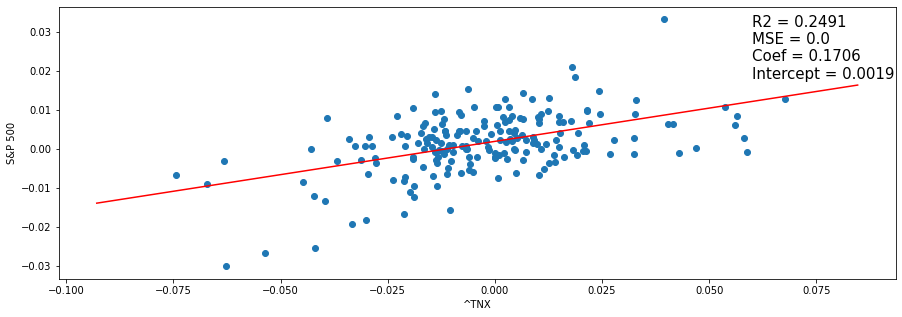

Correlation Coefficient: 0.49905416961275934


In [15]:
correlation_tnx = regression_analysis("^TNX", 0.06, 0.018)
print("Correlation Coefficient: {}".format(correlation_tnx))

Conclusion:
Highly Correlated Asset: "^TNX" , Least Correlated Asset: "BTC-USD".
Since the "^THX" has the largest correlation coefficient value and "BTC-USD" has the smallest one with absolute value.